In [1]:
import numpy as np
import matplotlib.pyplot as plt

from microlensing.Util import util

import mpl_style
plt.style.use(mpl_style.style)

In [2]:
is_ipm = True
is_double = False
prefix = ''
if is_ipm:
    prefix = f'{prefix}ipm_'
else:
    prefix = f'{prefix}irs_'

In [3]:
params = util.read_params(f'{prefix}parameter_info.txt')
params

{'kappa_tot': 0.400000006,
 'shear': 0.400000006,
 'mu_ave': 5,
 'smooth_fraction': 0.5,
 'kappa_star': 0.200000003,
 'kappa_star_actual': 0.200570717,
 'theta_star': 1,
 'random_seed': -954885446,
 'mass_function': 'kroupa',
 'm_solar': 1,
 'm_lower': 0.0799999982,
 'm_upper': 100,
 'mean_mass': 0.573864877,
 'mean_mass2': 4.47070551,
 'mean_mass2_ln_mass': 14.5995159,
 'm_lower_actual': 0.080001682,
 'm_upper_actual': 94.6379776,
 'mean_mass_actual': 0.575502396,
 'mean_mass2_actual': 4.8058095,
 'mean_mass2_ln_mass_actual': 16.0869846,
 'light_loss': 0.00100000005,
 'num_stars': 17313,
 'corner_x1': 88.4656906,
 'corner_x2': 442.287354,
 'taylor_smooth': 35,
 'safety_scale': 1.37,
 'center_y1': 0,
 'center_y2': 0,
 'half_length_y1': 25,
 'half_length_y2': 25,
 'num_pixels_y1': 5000,
 'num_pixels_y2': 5000,
 'center_x1': 0,
 'center_x2': 0,
 'half_length_x1': 64.4799957,
 'half_length_x2': 322.369995,
 'num_rays_y': 1,
 'num_rays_x': 10000,
 'ray_half_sep_1': 0.00499999989,
 'ray_hal

In [4]:
stars, _, _, _ = util.read_stars(f'{prefix}stars.bin', np.float32)
print(stars.shape)

(17313, 3)


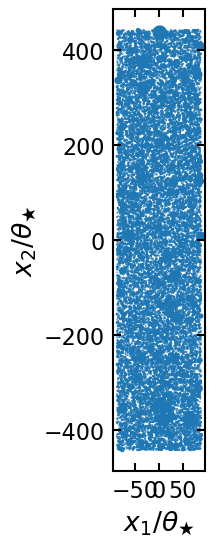

In [5]:
fig, ax = plt.subplots()
ax.scatter(stars[:, 0], stars[:, 1], s=stars[:,2])

ax.set_xlabel('$x_1 / \\theta_★$')
ax.set_ylabel('$x_2 / \\theta_★$')

ax.set_aspect(1)

plt.show()

In [6]:
dat = util.read_array(f'{prefix}magnifications.bin', np.float32)
# magnification
if is_ipm:
    mu = dat
else:
    mu = dat / params['num_rays_y']
print(np.min(mu))
print(np.max(mu))
print(np.mean(mu))
# astronomical magnitudes
mags = -2.5*np.log10(mu / np.abs(params['mu_ave']))
print(np.max(mags))
print(np.min(mags))

1.8474085
337.44388
4.7370377
1.0810177
-4.5730786


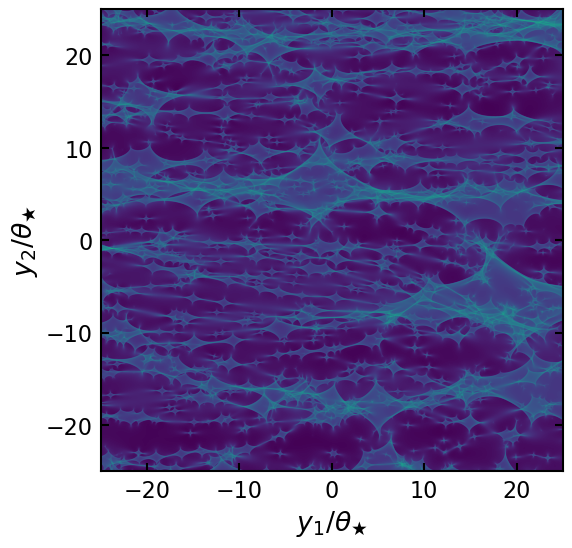

In [7]:
fig, ax = plt.subplots()
ax.imshow(mags[:,:], extent = [params['center_y1'] - params['half_length_y1'], 
                               params['center_y1'] + params['half_length_y1'], 
                               params['center_y2'] - params['half_length_y2'], 
                               params['center_y2'] + params['half_length_y2']],
          cmap = 'viridis_r')

ax.set_xlabel('$y_1 / \\theta_★$')
ax.set_ylabel('$y_2 / \\theta_★$')

ax.set_aspect(params['half_length_y1'] / params['half_length_y2'])

plt.show()

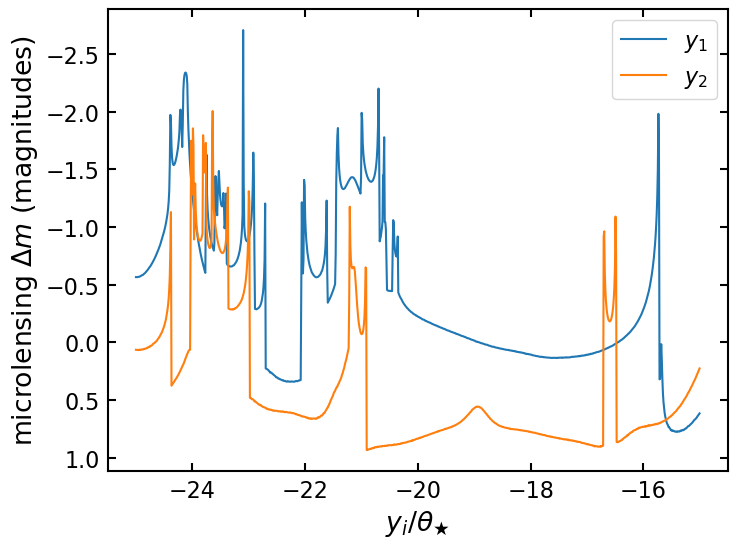

In [8]:
fig, ax = plt.subplots()

y1, step = np.linspace(params['center_y1'] - params['half_length_y1'],
                       params['center_y1'] + params['half_length_y1'],
                       params['num_pixels_y1'],
                       endpoint = False, retstep=True)
y1 += step/2

y2, step = np.linspace(params['center_y2'] - params['half_length_y2'],
                       params['center_y2'] + params['half_length_y2'],
                       params['num_pixels_y2'],
                       endpoint = False, retstep=True)
y2 += step/2

where = slice(0,1000)

ax.plot(y1[where], mags[100, where], label = '$y_1$')
ax.plot(y2[where], mags[where, 100], label = '$y_2$')

ax.legend()

ax.set_xlabel('$y_i / \\theta_★$')
ax.set_ylabel('microlensing $\\Delta m$ (magnitudes)')

ax.invert_yaxis()

plt.show()

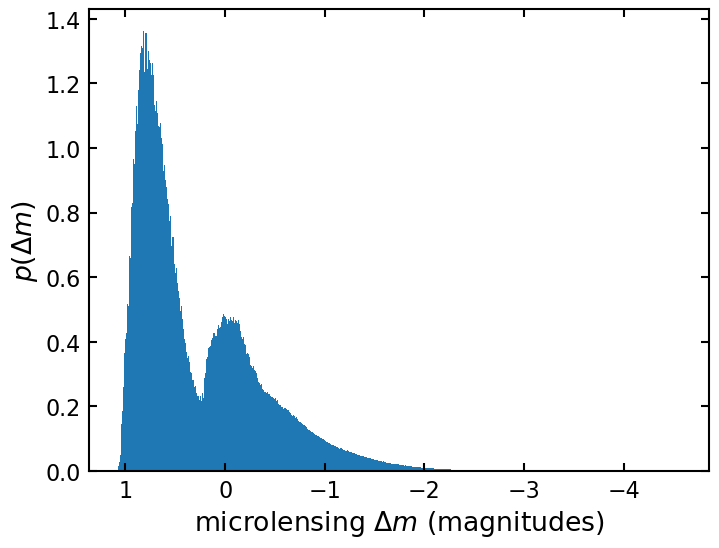

In [9]:
# magnification
if is_ipm:
    dat, num_pixels = util.read_hist(f'{prefix}mags_numpixels.txt').T
    mu = dat / 1000
else:
    dat, num_pixels = util.read_hist(f'{prefix}numrays_numpixels.txt').T
    mu = dat / params['num_rays_y']
# astronomical magnitudes
mags = -2.5*np.log10(mu / np.abs(params['mu_ave']))

fig, ax = plt.subplots()
ax.hist(mags, weights=num_pixels, density=True, bins = 1000)

ax.set_xlabel("microlensing $\\Delta m$ (magnitudes)")
ax.set_ylabel("$p(\\Delta m)$")

ax.invert_xaxis()

plt.show()